# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
unique_cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in unique_cities:
        unique_cities.append(city)

# Print the city count to confirm sufficient count
len(unique_cities)

592

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# If reposponse OKAY, then save json to cityweather list.
cityweather = []
print('Beginning Data Retrieval')
print('-' * 31)

for i, c in enumerate(unique_cities):
    base_url = 'http://api.openweathermap.org/data/2.5/weather?'
    r = requests.get(f'{base_url}q={c}&appid={api_key}&units=imperial')
    if r.status_code == 200:
        print(f'Processing Record {i:3d} of {len(unique_cities)} | {c.title()}')
        cityweather.append(r.json())
    else:
        print('City not found. Skipping...')
    
print('-' * 31)
print('Data Retrieval Complete')     
print('-' * 31)

Beginning Data Retrieval
-------------------------------
City not found. Skipping...
City not found. Skipping...
Processing Record   2 of 592 | Pevek
Processing Record   3 of 592 | Aranos
Processing Record   4 of 592 | Vardo
Processing Record   5 of 592 | Hermanus
Processing Record   6 of 592 | Kodiak
Processing Record   7 of 592 | Butaritari
City not found. Skipping...
City not found. Skipping...
Processing Record  10 of 592 | Punta Arenas
Processing Record  11 of 592 | Yumen
Processing Record  12 of 592 | Cracow
Processing Record  13 of 592 | Cabo San Lucas
Processing Record  14 of 592 | Timmins
Processing Record  15 of 592 | New Norfolk
City not found. Skipping...
Processing Record  17 of 592 | Kaitangata
Processing Record  18 of 592 | Jamestown
Processing Record  19 of 592 | Hithadhoo
Processing Record  20 of 592 | Am Timan
Processing Record  21 of 592 | Bethel
Processing Record  22 of 592 | Itarema
Processing Record  23 of 592 | Tagusao
Processing Record  24 of 592 | Bouloupari
Pr

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
data = pd.DataFrame(cityweather)
data.head(1)

,coord,weather,base,main,wind,snow,clouds,dt,sys,timezone,id,name,cod,visibility,rain
0,"{'lon': 170.27, 'lat': 69.7}","[{'id': 600, 'main': 'Snow', 'description': 'l...",model,"{'temp': -6.66, 'feels_like': -17.95, 'temp_mi...","{'speed': 8.39, 'deg': 338}",{'3h': 0.19},{'all': 100},1576431340,"{'country': 'RU', 'sunrise': 0, 'sunset': 0}",43200,2122090,Pevek,200,NaN,NaN


In [6]:
# Select only City, Cloudiness, Country, Date, Humidity,
# Latitude, Longitude, Max Temperature, and Wind Speed data.
cities = pd.DataFrame({
    'City': data['name'],
    'Cloudiness': [d['all'] for d in data['clouds']],
    'Country': [s['country'] for s in data['sys']],
    'Date': data['dt'],
    'Humidity': [m['humidity'] for m in data['main']],
    'Lat': [c['lat'] for c in data['coord']],
    'Lng': [c['lon'] for c in data['coord']],
    'Max Temp': [m['temp_max'] for m in data['main']],
    'Wind Speed': [m['speed'] for m in data['wind']],
})
cities.to_csv('data/cities.csv')
cities.count()

City          530
Cloudiness    530
Country       530
Date          530
Humidity      530
Lat           530
Lng           530
Max Temp      530
Wind Speed    530
dtype: int64

In [7]:
cities.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Pevek,100,RU,1576431340,98,69.70,170.27,-6.66,8.39
1,Aranos,0,NA,1576431340,21,-24.14,19.11,81.86,10.31
2,Vardo,75,US,1576431340,48,39.62,-77.74,51.01,23.04
3,Hermanus,0,ZA,1576431340,65,-34.42,19.24,62.01,5.01
4,Kodiak,90,US,1576431340,85,39.95,-94.76,24.01,6.93


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

12/15/19


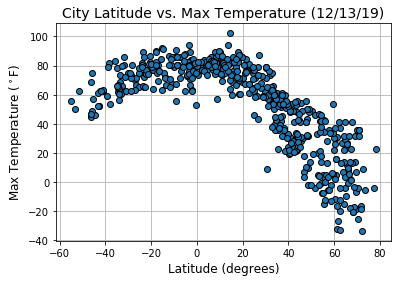

In [27]:
fmt_dt = pd.to_datetime(cities['Date'][0], unit='s')
fmt_dt = fmt_dt.strftime('%m/%d/%y')
plt.plot(cities['Lat'], cities['Max Temp'], 'o', markeredgecolor='k')
plt.title(f'City Latitude vs. Max Temperature ({fmt_dt})', size=14)
plt.xlabel('Latitude (degrees)', size=12)
plt.ylabel(r'Max Temperature ($^\circ$F)', size=12)
plt.grid()
plt.savefig('images/lat-vs-temp.png')

#### Latitude vs. Humidity Plot

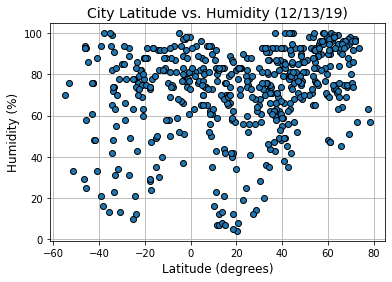

In [9]:
plt.plot(cities['Lat'], cities['Humidity'], 'o', markeredgecolor='k')
plt.title('City Latitude vs. Humidity (12/13/19)', size=14)
plt.xlabel('Latitude (degrees)', size=12)
plt.ylabel('Humidity (%)', size=12)
plt.grid()
plt.savefig('images/lat-vs-hum.png')

#### Latitude vs. Cloudiness Plot

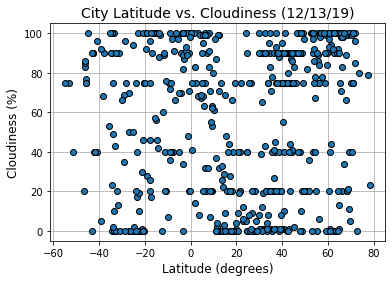

In [10]:
plt.plot( cities['Lat'], cities['Cloudiness'], 'o', markeredgecolor='k')
plt.title('City Latitude vs. Cloudiness (12/13/19)', size=14)
plt.xlabel('Latitude (degrees)', size=12)
plt.ylabel('Cloudiness (%)', size=12)
plt.grid()
plt.savefig('images/lat-vs-cloud.png')

#### Latitude vs. Wind Speed Plot

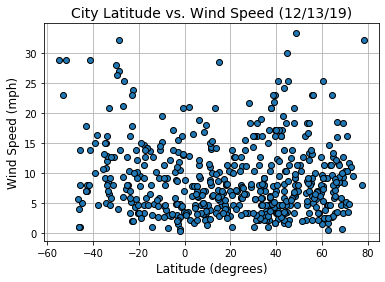

In [11]:
plt.plot(cities['Lat'], cities['Wind Speed'], 'o', markeredgecolor='k')
plt.title('City Latitude vs. Wind Speed (12/13/19)', size=14)
plt.xlabel('Latitude (degrees)', size=12)
plt.ylabel('Wind Speed (mph)', size=12)
plt.grid()
plt.savefig('images/lat-vs-speed.png')